# CEO-Request Challenge


🕵🏻 **Should Olist remove underperforming sellers from its marketplace ?**

## Problem statement

🕵🏻 To analyse the impact of removing the worse sellers from Olist's marketplace, we can start with a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? For that:

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

💡Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from olist import order, seller, product
from olist.data import Olist

### A. Analysis ideas:
        
**Olist Side**:

- seller can have bad reviews, but sells a lot (more revenue for olist) - **Key decision**

**Seller Side**:
- minimum sales for seller to make profit (80 * 1.1)
- help seller get better reviews (why seller has bad reviews)
- Seller with bad reviews but big revenue for Olist
- Columns for Seller revenue for first 3 months
- how long best sellers stayed with Olist

**Extra**
- where are bad sellers located (map of sellers)

## Revenue Analysis

### Olist Revenue

In [92]:
seller = seller.Seller().get_training_data()

In [93]:
olist_revenue = seller.copy()

#10% column
olist_revenue["ten_precent"] = olist_revenue["sales"] * 0.1

# number of active months
olist_revenue["num_months"] = np.ceil((((olist_revenue["date_last_sale"] - olist_revenue["date_first_sale"]).dt.days)/ 30))
olist_revenue["num_months"] = olist_revenue["num_months"].apply(lambda x: 1 if x == 0 else x)

# total monthly cost for seller
olist_revenue["total_monthly"] = olist_revenue["num_months"] * 80

# total olist revenue per seller so far
olist_revenue["olist_revenue"] = olist_revenue["ten_precent"] + olist_revenue["total_monthly"]

### Seller Revenue

In [94]:
# total seller revenue so far
olist_revenue["seller_revenue"] = olist_revenue["sales"] - olist_revenue["olist_revenue"]

In [95]:
olist_revenue

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales,ten_precent,num_months,total_monthly,olist_revenue,seller_revenue
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,3,3,1.000000,218.70,21.870,4.0,320.0,341.870,-123.170
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,40,41,1.025000,11703.07,1170.307,15.0,1200.0,2370.307,9332.763
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,1,1,1.000000,158.00,15.800,1.0,80.0,95.800,62.200
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,1,1,1.000000,79.99,7.999,1.0,80.0,87.999,-8.009
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,1,1,1.000000,167.99,16.799,1.0,80.0,96.799,71.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.000000,1.000000,5.00,2,2,1.000000,158.00,15.800,1.0,80.0,95.800,62.200
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,0.100000,0.500000,4.10,10,10,1.000000,889.00,88.900,14.0,1120.0,1208.900,-319.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,0.000000,1.000000,5.00,6,7,1.166667,550.04,55.004,5.0,400.0,455.004,95.036
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,0.000000,0.500000,4.25,8,11,1.375000,297.00,29.700,5.0,400.0,429.700,-132.700


<AxesSubplot:xlabel='num_months', ylabel='olist_revenue'>

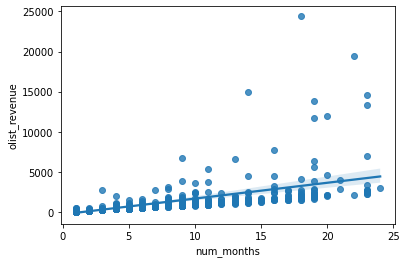

In [136]:
sns.regplot(x="num_months", y="olist_revenue", data=olist_revenue.sample(600))

<AxesSubplot:xlabel='seller_revenue', ylabel='Probability'>

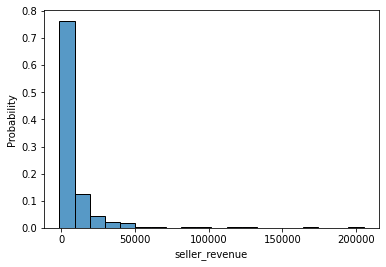

In [145]:
tmp2 = olist_revenue[olist_revenue["num_months"] >= 10]
sns.histplot(x="seller_revenue", bins= 20,data=tmp2, stat="probability")

### Sellers first three months

In [98]:
order_data.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [99]:
order_data = Olist().get_data()['orders']
order_item = Olist().get_data()['order_items']

In [120]:
tmp = order_item.merge(order_data, on="order_id")\
          .merge(olist_revenue, on="seller_id")\
            [["order_id", "seller_id", "order_approved_at", "date_first_sale", "price"]]

In [121]:
tmp["order_approved_at"] = pd.to_datetime(tmp["order_approved_at"])

In [122]:
tmp["num_months"] = np.ceil((((tmp["order_approved_at"] - tmp["date_first_sale"]).dt.days)/ 30)) + 1
tmp_grouped = tmp.groupby(["seller_id", "num_months"]).sum().reset_index()

tmp_grouped["seller_revenue"] = (tmp_grouped["price"] * 0.9) - (tmp_grouped["num_months"] * 80)


In [123]:
tmp_grouped

,seller_id,num_months,price,seller_revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,1.0,895.0,725.50
1,0015a82c2db000af6aaaf3ae2ecb0532,2.0,1790.0,1451.00
2,001cca7ae9ae17fb1caed9dfb1094831,1.0,99.9,9.91
3,001cca7ae9ae17fb1caed9dfb1094831,2.0,1298.7,1008.83
4,001cca7ae9ae17fb1caed9dfb1094831,3.0,1586.8,1188.12
...,...,...,...,...
17453,fffd5413c0700ac820c7069d66d98c89,15.0,196.8,-1022.88
17454,ffff564a4f9085cd26170f4732393726,1.0,51.5,-33.65
17455,ffff564a4f9085cd26170f4732393726,2.0,69.0,-97.90
17456,ffff564a4f9085cd26170f4732393726,5.0,238.5,-185.35


<AxesSubplot:xlabel='num_months', ylabel='seller_revenue'>

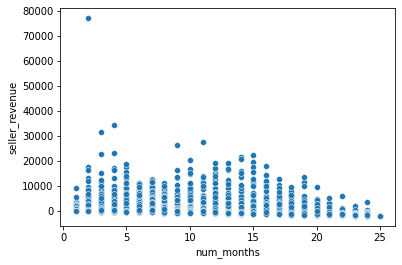

In [131]:
sns.scatterplot(y="seller_revenue", x="num_months", data=tmp_grouped)

In [103]:
# sales after one month
tmp_one_month = tmp[tmp["num_months"] == 1]
tmp_one_month = tmp_one_month.groupby("seller_id", as_index=False).sum()[["seller_id", "price"]]
tmp_one_month["seller_revenue_one_month"] = (tmp_one_month["price"] * 0.9) - 80

In [108]:
tmp

,order_id,seller_id,order_approved_at,date_first_sale,price,num_months
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,2017-09-13 09:45:35,2017-03-15 09:19:06,58.90,8.0
1,0188777fe321843a18be24a6e9aa1e53,48436dade18ac8b2bce089ec2a041202,2017-07-25 14:35:11,2017-03-15 09:19:06,55.90,6.0
2,0191bbb5166d4b9a68df11797d5acfa9,48436dade18ac8b2bce089ec2a041202,2017-08-10 12:30:15,2017-03-15 09:19:06,132.90,6.0
3,03054d8a8eefc2981cfad06f58e27979,48436dade18ac8b2bce089ec2a041202,2017-10-03 10:35:11,2017-03-15 09:19:06,58.90,8.0
4,0c325ea6925de749e1420be0cf43587c,48436dade18ac8b2bce089ec2a041202,2017-07-01 15:43:50,2017-03-15 09:19:06,139.90,5.0
...,...,...,...,...,...,...
112436,fdaf98feac227eb978d8f33f36e0231d,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-21 05:10:28,2017-04-21 05:10:28,119.90,1.0
112437,fdfeec75aa07c1d2a88b17b8fbfc7b8f,dbc51f5e45d654ecc16cb68e6817ecea,2017-02-24 22:42:22,2017-02-24 22:42:22,199.99,1.0
112438,fe68b52db13993f58175fa589125d345,3fefda3299e6dfaea3466ef346a3571a,2017-08-12 02:55:27,2017-08-12 02:55:27,209.00,1.0
112439,ff701a7c869ad21de22a6994237c8a00,3e35a8bb43569389d3cebef0ce820f69,2018-04-12 20:10:33,2018-04-12 20:10:33,27.90,1.0


In [104]:
olist_revenue = olist_revenue.merge(tmp_one_month, on="seller_id").drop("price", axis=1)

In [106]:
olist_revenue.head(1)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales,ten_precent,num_months,total_monthly,olist_revenue,seller_revenue,seller_revenue_one_month
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.0,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.0,3,3,1.0,218.7,21.87,4.0,320.0,341.87,-123.17,11.53


<AxesSubplot:xlabel='seller_revenue_one_month', ylabel='num_months'>

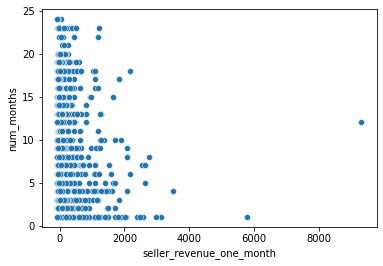

In [107]:
sns.scatterplot(x="seller_revenue_one_month", y="num_months", data=olist_revenue)

<AxesSubplot:xlabel='num_months', ylabel='Count'>

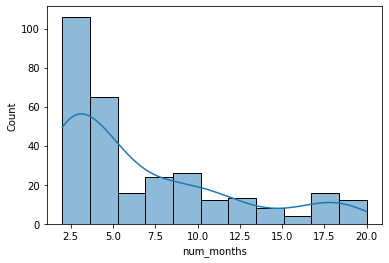

In [88]:
# sellers which lost money

seller_loss = olist_revenue[olist_revenue["seller_revenue_one_month"] <= 0].sort_values("seller_revenue_one_month")
sns.histplot(seller_loss["num_months"], kde=True)

<AxesSubplot:xlabel='num_months', ylabel='Count'>

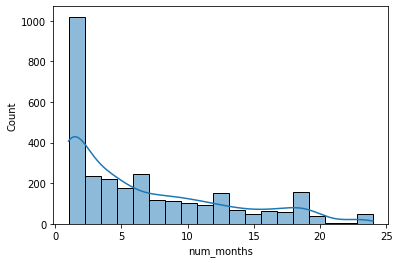

In [39]:
sns.histplot(olist_revenue["num_months"], kde=True)

## Cost Analysis

### Loss per Review

In [9]:
data = Olist().get_matching_table()

In [10]:
review_score = order.Order().get_review_score()
review_score_seller = review_score.merge(data, on="order_id")[["order_id", "seller_id", 
                                                               'dim_is_five_star', 'dim_is_one_star', 'review_score']]

In [11]:
review_score_dict = {1:100, 2:50, 3:40, 4:0, 5:0}
review_score_seller["review_score_cost"] = review_score_seller["review_score"].map(review_score_dict)

# group by seller id and sum review_score_cost
review_score_cost = review_score_seller.groupby("seller_id", as_index=False).sum()[["seller_id", "review_score_cost"]]

In [12]:
review_score_cost.rename({"review_score_cost": "total_review_cost"}, inplace=True, axis=1)
review_score_cost.sort_values("total_review_cost", inplace=True, ascending=False)
review_score_cost = review_score_cost.merge(olist_revenue, on="seller_id")[["seller_id", "total_review_cost", "olist_revenue"]]
review_score_cost

,seller_id,total_review_cost,olist_revenue
0,4a3ca9315b744ce9f8e9374361493884,42340,21647.292
1,6560211a19b47992c3666cc44a7e94c0,38880,13850.483
2,cc419e0650a3c5ba77189a1882b7556a,31230,12028.842
3,7c67e1448b00f6e969d365cea6b010ab,29950,20312.389
4,1f50f920176fa81dab994f9023523100,24400,12133.921
...,...,...,...
2962,4fae87d32467e18eb46e4a76a0a0b9ce,0,90.090
2963,bba8d0c234a52b87b3957037a215d1a4,0,92.000
2964,4f1f1c8666cdb6442f775c4e8caed465,0,174.498
2965,bbe87dce25ba8b38bb61cc7210a3f10b,0,348.700


### IT - Cost

In [13]:
tot_orders = data["order_id"].count()

In [14]:
# calculate cost per order, if for all orders cost = 500.000
it_cost_per_order = 500_000/tot_orders
it_cost_per_order

4.816723664563364

In [15]:
order_per_seller = seller[["seller_id", "n_orders"]].copy()
order_per_seller["it_cost"] = (order_per_seller["n_orders"] * it_cost_per_order).map(np.sqrt)
order_per_seller

,seller_id,n_orders,it_cost
0,3442f8959a84dea7ee197c632cb2df15,3,3.801338
1,d1b65fc7debc3361ea86b5f14c68d2e2,40,13.880524
2,ce3ad9de960102d0677a81f5d0bb7b2d,1,2.194704
3,c0f3eea2e14555b6faeea3dd58c1b1c3,1,2.194704
4,51a04a8a6bdcb23deccc82b0b80742cf,1,2.194704
...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,2,3.103780
2963,f8201cab383e484733266d1906e2fdfa,10,6.940262
2964,74871d19219c7d518d0090283e03c137,6,5.375904
2965,e603cf3fec55f8697c9059638d6c8eb5,8,6.207559


<AxesSubplot:xlabel='n_orders', ylabel='it_cost'>

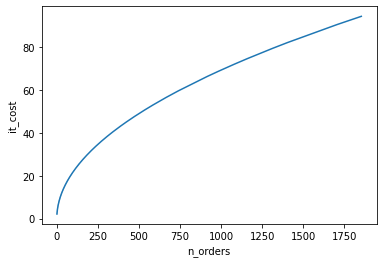

In [16]:
sns.lineplot(x="n_orders", y ="it_cost", data=order_per_seller)

### Total Cost per Seller

In [17]:
total_seller_cost = review_score_cost.merge(order_per_seller, on="seller_id")
total_seller_cost.drop("n_orders", axis=1, inplace=True)

In [18]:
total_seller_cost.columns

Index(['seller_id', 'total_review_cost', 'olist_revenue', 'it_cost'], dtype='object')

In [19]:
total_seller_cost = total_seller_cost[['seller_id', 'total_review_cost', 'it_cost', 'olist_revenue']]
total_seller_cost

,seller_id,total_review_cost,it_cost,olist_revenue
0,4a3ca9315b744ce9f8e9374361493884,42340,93.268446,21647.292
1,6560211a19b47992c3666cc44a7e94c0,38880,94.499765,13850.483
2,cc419e0650a3c5ba77189a1882b7556a,31230,90.649493,12028.842
3,7c67e1448b00f6e969d365cea6b010ab,29950,68.775160,20312.389
4,1f50f920176fa81dab994f9023523100,24400,82.235516,12133.921
...,...,...,...,...
2962,4fae87d32467e18eb46e4a76a0a0b9ce,0,2.194704,90.090
2963,bba8d0c234a52b87b3957037a215d1a4,0,2.194704,92.000
2964,4f1f1c8666cdb6442f775c4e8caed465,0,3.103780,174.498
2965,bbe87dce25ba8b38bb61cc7210a3f10b,0,3.103780,348.700



2️⃣ # We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

In [20]:
bad_sellers = total_seller_cost.copy()


bad_sellers["total_cost"] = bad_sellers["total_review_cost"] + bad_sellers["it_cost"]

bad_sellers = bad_sellers[bad_sellers["total_cost"] > bad_sellers["olist_revenue"]]
bad_sellers["olist_loss"] = bad_sellers["total_cost"] - bad_sellers["olist_revenue"]
# talk with sellers, they are shit

In [21]:
# sort by olist loss
bad_sellers.sort_values("olist_loss", ascending=False)

,seller_id,total_review_cost,it_cost,olist_revenue,total_cost,olist_loss
1,6560211a19b47992c3666cc44a7e94c0,38880,94.499765,13850.483,38974.499765,25124.016765
0,4a3ca9315b744ce9f8e9374361493884,42340,93.268446,21647.292,42433.268446,20785.976446
2,cc419e0650a3c5ba77189a1882b7556a,31230,90.649493,12028.842,31320.649493,19291.807493
6,ea8482cd71df3c1969d7b9473ff13abc,21390,74.296469,4757.752,21464.296469,16706.544469
13,8b321bb669392f5163d04c59e235e066,15690,67.395626,2553.569,15757.395626,13203.826626
...,...,...,...,...,...,...
1673,2a50b7ee5aebecc6fd0ff9784a4747d6,100,2.194704,99.980,102.194704,2.214704
1573,19484c79cef6c062cb177aa4ef2fcc3c,100,2.194704,100.190,102.194704,2.004704
846,95b293867b5862941c9cd74f756a3c68,300,6.584111,304.810,306.584111,1.774111
1419,a4b8d97cd5d3674eeff96abc99d8ed67,100,2.194704,101.408,102.194704,0.786704


### Total Olist Loss

In [22]:
bad_sellers["olist_loss"].sum()

352550.5139183469

<details>
    <summary>- <i>Hints</i> -</summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

⚠️ Do no start from scratch ! Investigate your source code in `seller.py` : 
- how was the mean `review_score` per seller computed? 
- Can you think about  a way to update your code to incorporate the `cost_of_reviews`? 

</details>


## Worst performing products

Should Olist remove the worst performing products / categories from its marketplace entirely?

In [23]:
from olist import product

In [24]:
product_df = product.Product().get_training_data()

In [25]:
product_df

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category,wait_time,price,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,sales
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,3.017639,10.910000,0.000000,1.000000,5.000000,1,1,10.91
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,10.275272,16.900000,0.000000,0.500000,3.500000,2,2,33.80
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,13.933686,325.627273,0.200000,0.400000,3.700000,10,11,3581.90
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,21.219062,399.900000,0.000000,0.000000,2.000000,1,1,399.90
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,8.965984,137.900000,0.000000,1.000000,5.000000,1,1,137.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31479,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery,8.681667,129.900000,0.000000,0.000000,3.000000,1,1,129.90
31480,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery,6.077801,249.000000,0.000000,1.000000,5.000000,1,1,249.00
31481,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery,17.546076,399.990000,0.000000,0.000000,4.000000,1,1,399.99
31482,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery,12.412835,84.545455,0.136364,0.681818,4.272727,22,22,1860.00


- Translate bad reviews
- look for keywords (wait, waiting, waited time, , time, delivery)

<AxesSubplot:xlabel='wait_time', ylabel='review_score'>

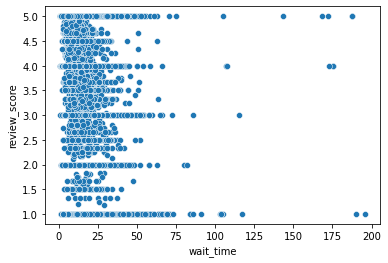

In [26]:
sns.scatterplot(x="wait_time", y="review_score", data=product_df)

In [30]:
order_distance = order.Order().get_training_data( is_delivered=True,
                                                 with_distance_seller_customer=True)

In [31]:
order_distance

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,1,0,5,1,1,72.00,13.08,69.481037
95876,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,0,0,4,1,1,174.90,20.10,474.098245
95877,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,1,0,5,1,1,205.99,65.02,968.051192
95878,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,0,0,2,2,1,359.98,81.18,370.146853


In [32]:
x=order_distance["distance_seller_customer"]

In [37]:
import pandas as pd
pd.cut(x, bins=50)

0          (-8.737, 174.739]
1         (698.956, 873.695]
2         (349.478, 524.217]
3        (1747.39, 1922.128]
4          (-8.737, 174.739]
                ...         
95875      (-8.737, 174.739]
95876     (349.478, 524.217]
95877    (873.695, 1048.434]
95878     (349.478, 524.217]
95879     (524.217, 698.956]
Name: distance_seller_customer, Length: 95872, dtype: category
Categories (50, interval[float64, right]): [(-8.737, 174.739] < (174.739, 349.478] < (349.478, 524.217] < (524.217, 698.956] ... (8037.992, 8212.731] < (8212.731, 8387.47] < (8387.47, 8562.209] < (8562.209, 8736.948]]